<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83279 entries, 0 to 83278
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    83279 non-null  int64  
 1   V1      83279 non-null  float64
 2   V2      83279 non-null  float64
 3   V3      83279 non-null  float64
 4   V4      83279 non-null  float64
 5   V5      83279 non-null  float64
 6   V6      83279 non-null  float64
 7   V7      83279 non-null  float64
 8   V8      83279 non-null  float64
 9   V9      83279 non-null  float64
 10  V10     83278 non-null  float64
 11  V11     83278 non-null  float64
 12  V12     83278 non-null  float64
 13  V13     83278 non-null  float64
 14  V14     83278 non-null  float64
 15  V15     83278 non-null  float64
 16  V16     83278 non-null  float64
 17  V17     83278 non-null  float64
 18  V18     83278 non-null  float64
 19  V19     83278 non-null  float64
 20  V20     83278 non-null  float64
 21  V21     83278 non-null  float64
 22

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='Class'>

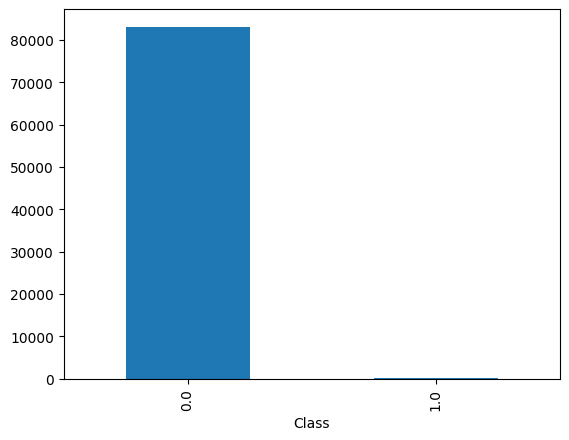

In [8]:
df.Class.value_counts().plot(kind='bar')

In [25]:

import pandas as pd
# Check the class distribution
print(df['Class'].value_counts())

# Since the dataset is imbalanced, we can use techniques like oversampling or undersampling.
# Here, we will use oversampling with SMOTE (Synthetic Minority Over-sampling Technique)

from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Check the class distribution after oversampling
print(df_resampled['Class'].value_counts())


Class
0.0    83077
1.0      201
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [11]:
if y.isnull().values.any():
  # Remove rows with missing target values
  X = X[~y.isnull()]
  y = y[~y.isnull()]

In [12]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)
df_resampled=pd.DataFrame(X_resampled,columns=X.columns)
df_resampled['Class']=y_resampled

<Axes: xlabel='Class'>

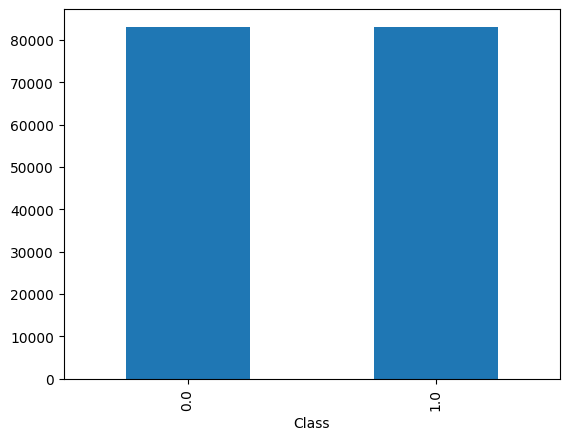

In [13]:
df_resampled['Class'].value_counts().plot(kind='bar')

In [6]:
X=df.drop('Class',axis=1)
y=df['Class']

In [14]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166154 entries, 0 to 166153
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    166154 non-null  int64  
 1   V1      166154 non-null  float64
 2   V2      166154 non-null  float64
 3   V3      166154 non-null  float64
 4   V4      166154 non-null  float64
 5   V5      166154 non-null  float64
 6   V6      166154 non-null  float64
 7   V7      166154 non-null  float64
 8   V8      166154 non-null  float64
 9   V9      166154 non-null  float64
 10  V10     166154 non-null  float64
 11  V11     166154 non-null  float64
 12  V12     166154 non-null  float64
 13  V13     166154 non-null  float64
 14  V14     166154 non-null  float64
 15  V15     166154 non-null  float64
 16  V16     166154 non-null  float64
 17  V17     166154 non-null  float64
 18  V18     166154 non-null  float64
 19  V19     166154 non-null  float64
 20  V20     166154 non-null  float64
 21  V21     16

In [15]:
X=df_resampled.drop('Class',axis=1)
y=df_resampled['Class']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=model.predict(X_test)

In [20]:
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [21]:
pd.DataFrame({"orignal":y_test,"predicted":y_pred})

,orignal,predicted
87678,1.0,1.0
149208,1.0,1.0
36595,0.0,0.0
140410,1.0,1.0
122056,1.0,1.0
...,...,...
4172,0.0,0.0
41590,0.0,0.0
157446,1.0,1.0
24452,0.0,0.0


In [23]:
accuracy=model.score(X_test,y_test)

In [24]:
accuracy

0.9798681953597544

In [26]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score

In [27]:
f1_score(y_test,y_pred)

0.9797732426303855

In [28]:
precision_score(y_test,y_pred)

0.9908879647749511

In [30]:
recall_score  (y_test,y_pred)

0.9689051007594331